In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
sns.set()

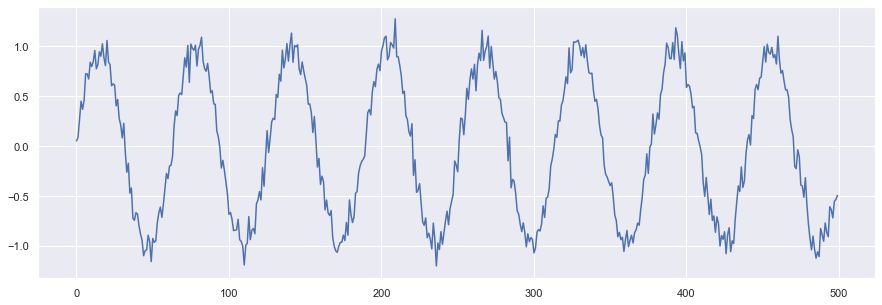

In [2]:
# make the time series data by adding noise to sine wave
size = 500
series = np.sin(0.1*np.arange(size)) + np.random.randn(size)*0.1

# visulize the series
plt.figure(figsize=(15,5))
plt.plot(series)

In [3]:
# create sequence dataset where we will look T past values to predict next value
T = 10
X = []
Y = []

for t in range(len(series)-T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)

In [4]:
# print shape of X and Y
print("X shape {} and Y shape {}".format(X.shape,Y.shape))

X shape (490, 10) and Y shape (490,)


In [5]:
# Input to LSTM Layer
    # N = number of samples
    # T = sequence length
    # D = number of input features
    # M = number of hidden units
    # K = number of output units
# Input shape : N X T X D

In [6]:
X = np.array(X).reshape(-1, T, 1)
# print shape of X and Y
print("X shape {} and Y shape {}".format(X.shape,Y.shape))

X shape (490, 10, 1) and Y shape (490,)


In [7]:
# Train & Test Split
test_size = 0.50
test_len = int(190*test_size)
boundary = X.shape[0]-test_len

# Train input and output
X_train = X[:boundary]
y_train = Y[:boundary]

# Test input and output
X_test = X[boundary:]
y_test = Y[boundary:]

In [8]:
# print Train and Test Shape
print("X Train shape {} and Y Train shape {}".format(X_train.shape,y_train.shape))
print("X Test shape {} and Y Test shape {}".format(X_test.shape,y_test.shape))

X Train shape (395, 10, 1) and Y Train shape (395,)
X Test shape (95, 10, 1) and Y Test shape (95,)


In [10]:
# LSTM Model for forecasting
i = Input(shape=(X_train.shape[1:]))
x = LSTM(5,activation='tanh')(i)   #LSTM with five hidden layer
x = Dense(1)(x)              # one output
model = Model(i,x)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Model compile
model.compile(optimizer='adam',loss='mse')

# train the model
hist = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Train on 395 samples, validate on 95 samples
Epoch 1/50
395/395 [==============================] - 3s 9ms/sample - loss: 0.2950 - val_loss: 0.3025
Epoch 2/50
395/395 [==============================] - 0s 389us/sample - loss: 0.2347 - val_loss: 0.2432
Epoch 3/50
395/395 [==============================] - 0s 333us/sample - loss: 0.1888 - val_loss: 0.1949
Epoch 4/50
395/395 [==============================] - 0s 333us/sample - loss: 0.1549 - val_loss: 0.1571
Epoch 5/50
395/395 [==============================] - 0s 389us/sample - loss: 0.1314 - val_loss: 0.1291
Epoch 6/50
395/395 [==============================] - 0s 373us/sample - loss: 0.1145 - val_loss: 0.1122
Epoch 7/50
395/395 [==============================] - 0s 350us/sample - loss: 0.1040 - val_loss: 0.1003
Epoch 8/50
395/395 [==============================] - 0s 411us/sample - loss: 0.0970 - val_loss: 0.0912
Epoch 9/50
395/395 [==============================] - 0s 349us/sample - loss: 0.0913 - val_loss: 0.0862
Epoch 10/50
395/395 [

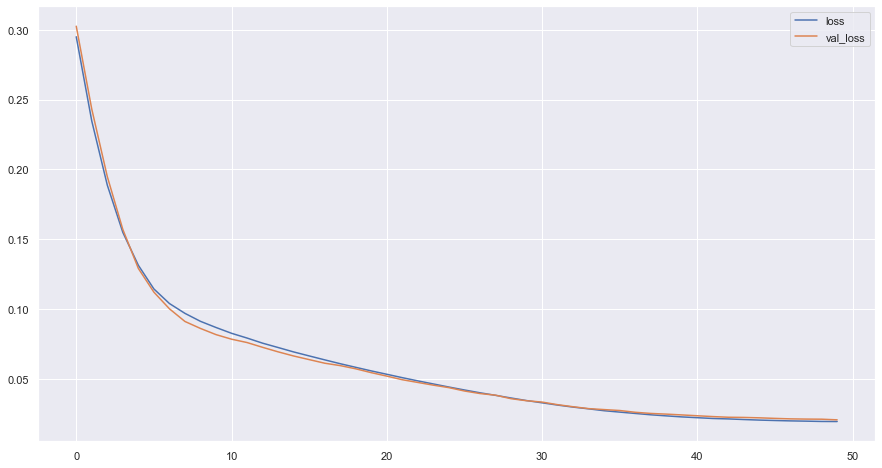

In [13]:
# plot loss 
plt.figure(figsize=(15,8))
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

In [14]:
# Forecasting
forecast = []
last_actual = X_train[-1]  # first input sequence to the model
for t in range(X_test.shape[0]):
    predict = model.predict(last_actual.reshape(1,-1,1))
    predict = predict[0][0]  # get single scalar value
    
    # create next model input sequence
    last_actual = np.roll(last_actual,-1)
    last_actual[-1] = predict
    
    forecast.append(predict)

forecast = np.array(forecast)
print("Actual Y Test shape {} and Predicted Y Test shape {}".format(y_test.shape,forecast.shape))

Actual Y Test shape (95,) and Predicted Y Test shape (95,)


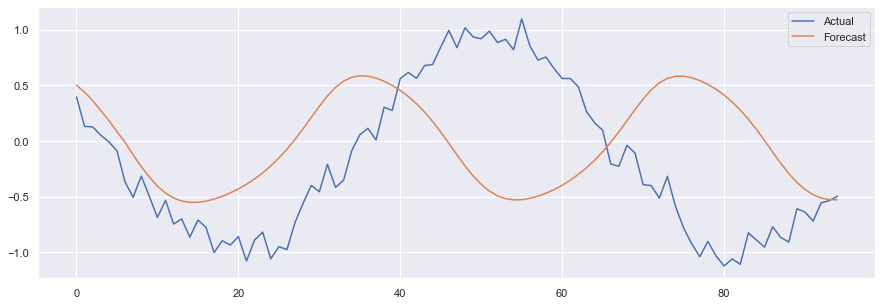

In [15]:
# plot actual vs Forecast
plt.figure(figsize=(15,5))
plt.plot(y_test,label='Actual')
plt.plot(forecast,label='Forecast')
plt.legend()